<a href="https://colab.research.google.com/github/rajendran-official/AI_ML_COURSE_ICT/blob/Supervised-learning/Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Classification Example – Iris Dataset (Predict flower species)**

Shape: (150, 4)

First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Class distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


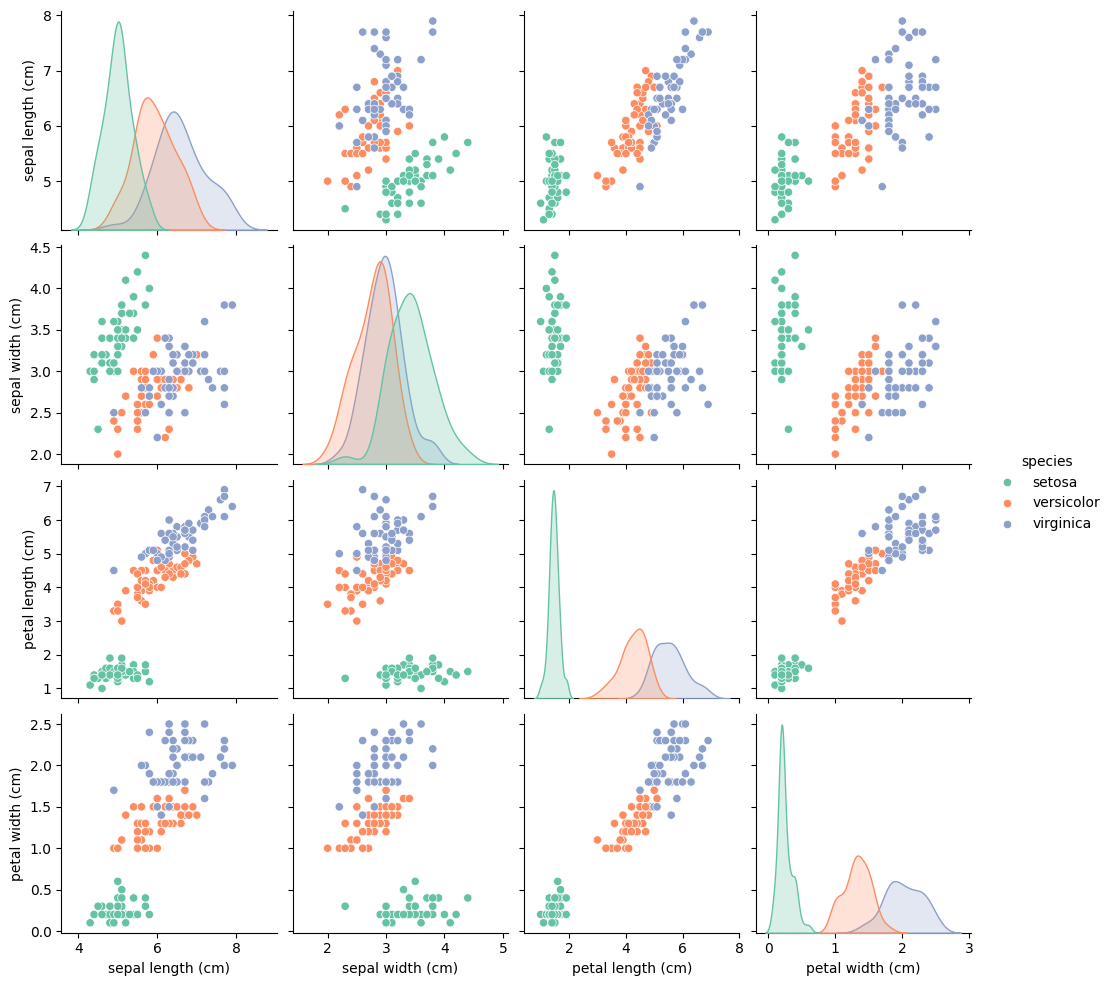


Decision Tree
Accuracy : 0.8947
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



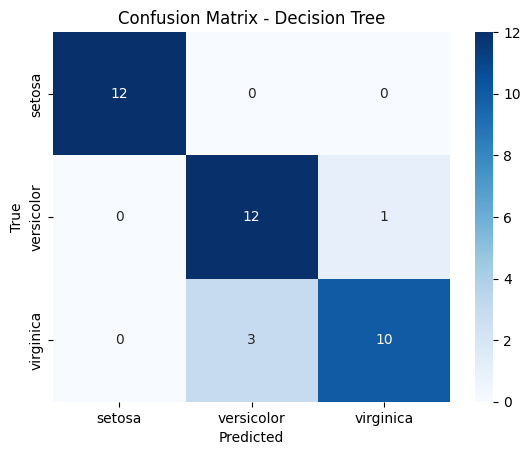


Random Forest
Accuracy : 0.9211
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



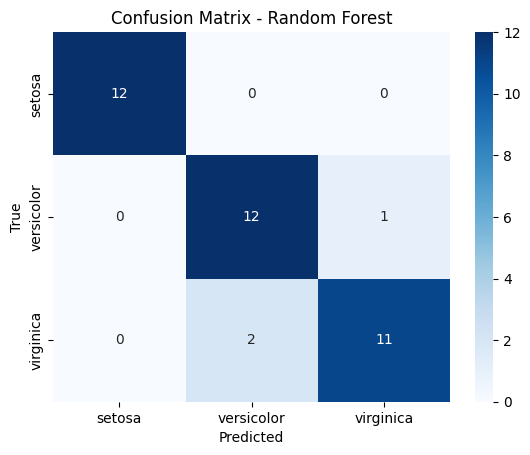

In [1]:
# Cell 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier   # We'll compare two models

# Cell 2: Load and understand the data
iris = load_iris()
X = iris.data          # features (4 columns)
y = iris.target        # labels (0, 1, 2 → setosa, versicolor, virginica)

# Convert to DataFrame for easier visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

print("Shape:", X.shape)                  # (150, 4)
print("\nFirst 5 rows:\n", df.head())
print("\nClass distribution:\n", df['species'].value_counts())

# Cell 3: Visualize (optional but very helpful)
sns.pairplot(df, hue='species', palette='Set2')
plt.show()

# Cell 4: Train-test split + scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Cell 5: Train two models and compare
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy : {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

**2. Regression Example – California Housing (Predict median house value)**

Shape: (20640, 8)

Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude  MedHouseVal  
count  20640.00   20640.00     20640.00  
mean      35.63    -119.57         2.07  
std        2.14       2.00         1.15  
min       32.54    -124.35         0.15  
25%       33.9

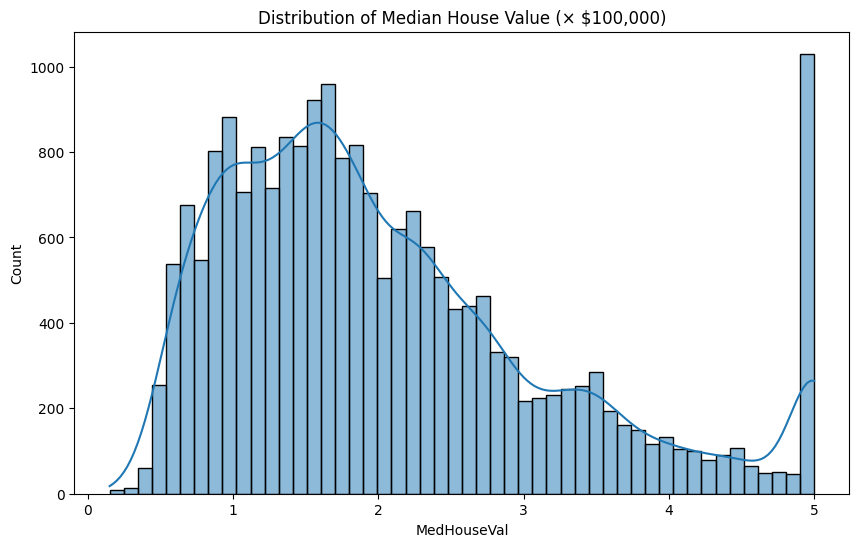

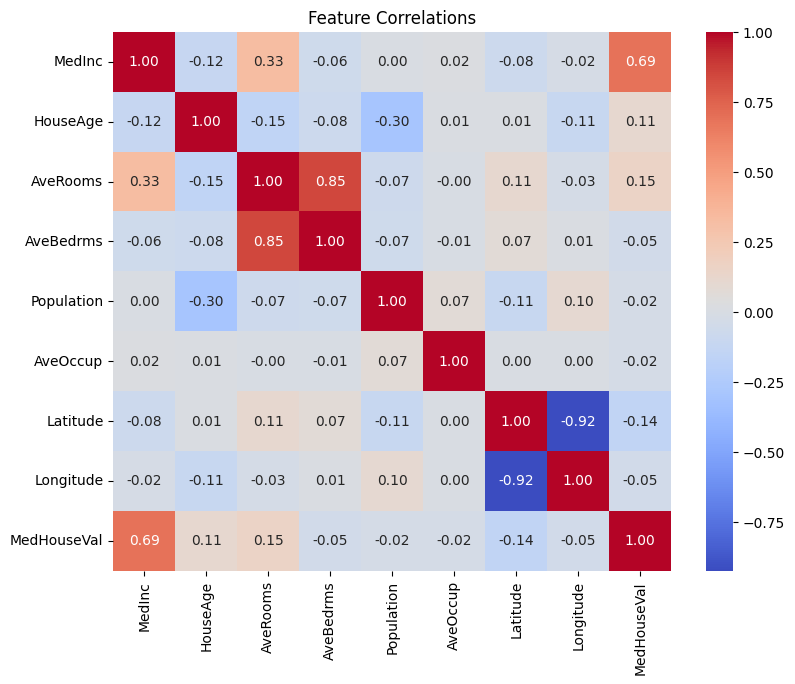


Linear Regression
RMSE : 0.7456 ($100k units)
R²   : 0.5758
MAE  : 0.5332 ($100k units)

Random Forest
RMSE : 0.5051 ($100k units)
R²   : 0.8053
MAE  : 0.3274 ($100k units)

Model Comparison:
               Model    RMSE      R²     MAE
0  Linear Regression  0.7456  0.5758  0.5332
1      Random Forest  0.5051  0.8053  0.3274


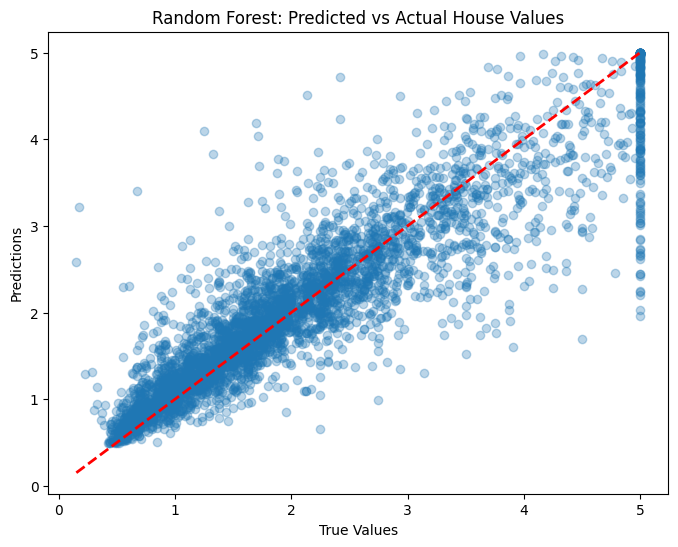

In [2]:
# Cell 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Cell 2: Load data
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target          # median house value in $100,000

df = housing.frame
print("Shape:", X.shape)              # (20640, 8)
print("\nColumns:", list(X.columns))
print(df.describe().round(2))

# Cell 3: Quick visualization
plt.figure(figsize=(10,6))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Median House Value (× $100,000)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()

# Cell 4: Split + Scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Cell 5: Train & Evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)

    results.append([name, rmse, r2, mae])

    print(f"\n{name}")
    print(f"RMSE : {rmse:.4f} ($100k units)")
    print(f"R²   : {r2:.4f}")
    print(f"MAE  : {mae:.4f} ($100k units)")

# Cell 6: Compare results in table
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R²", "MAE"])
print("\nModel Comparison:")
print(results_df.round(4))

# Bonus: Plot predictions vs actual (best model)
best_model = models["Random Forest"]
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest: Predicted vs Actual House Values")
plt.show()